In [1]:
# 03_model_explainability.ipynb

### 1. Imports
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Enable JS for force plots
shap.initjs()


In [4]:
### 2. Load Processed Data and Model

# Load test data (use the same processed data as Step 2)
df = pd.read_csv('data/processed/diabetes_cleaned.csv')

# Load model
model_bundle = joblib.load('models/random_forest.pkl')
rf_model = model_bundle['model']
feature_names = model_bundle['features']


In [5]:
### 3. Preprocess Data for SHAP (Encode Again to Match Model Input)
### 6. Global Feature Importance Plot


# Ensure the data is in the same format as used for model training
X_raw = df.drop('readmitted', axis=1)
y = df['readmitted']

# Encode categorical columns using one-hot encoding
cat_cols = X_raw.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)

# Ensure column order is identical
X_encoded = X_encoded[feature_names]


In [6]:
### 4. Sample Subset for SHAP (to make it faster)

# Use a sample of 100 for SHAP to speed up computation
X_sample = X_encoded.sample(n=100, random_state=42)
X_sample = X_sample.astype(np.float64)  # Convert all columns to float



In [7]:
### 5. Generate SHAP Values

# Use TreeExplainer for Random Forest
explainer = shap.Explainer(rf_model, X_sample)
# Get only class 1 SHAP values (positive class, readmitted = 1)
shap_values = explainer(X_sample)
shap_values = shap_values[..., 1]  # Extract SHAP values for class 1 only



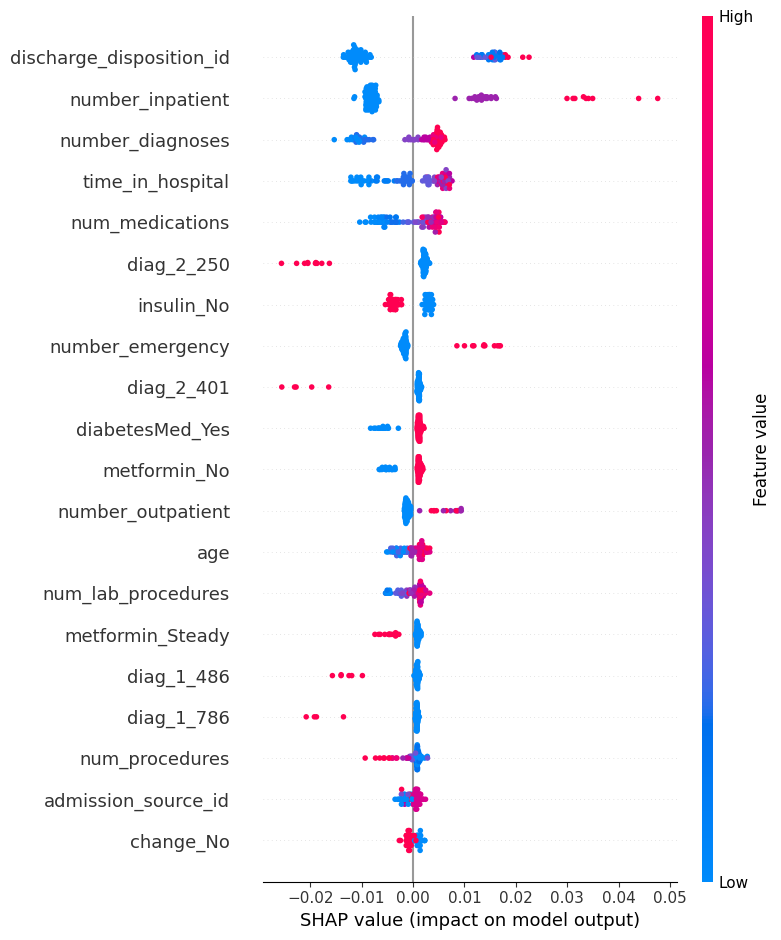

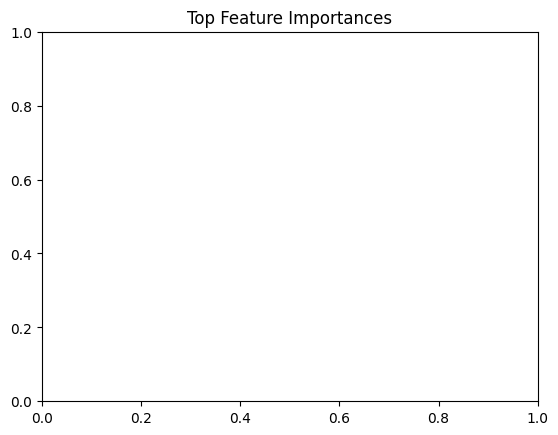

In [8]:
### 6. Global Feature Importance Plot

shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names)

plt.title("Top Feature Importances")
plt.savefig('outputs/shap_feature_importance.png', bbox_inches='tight')
plt.show()


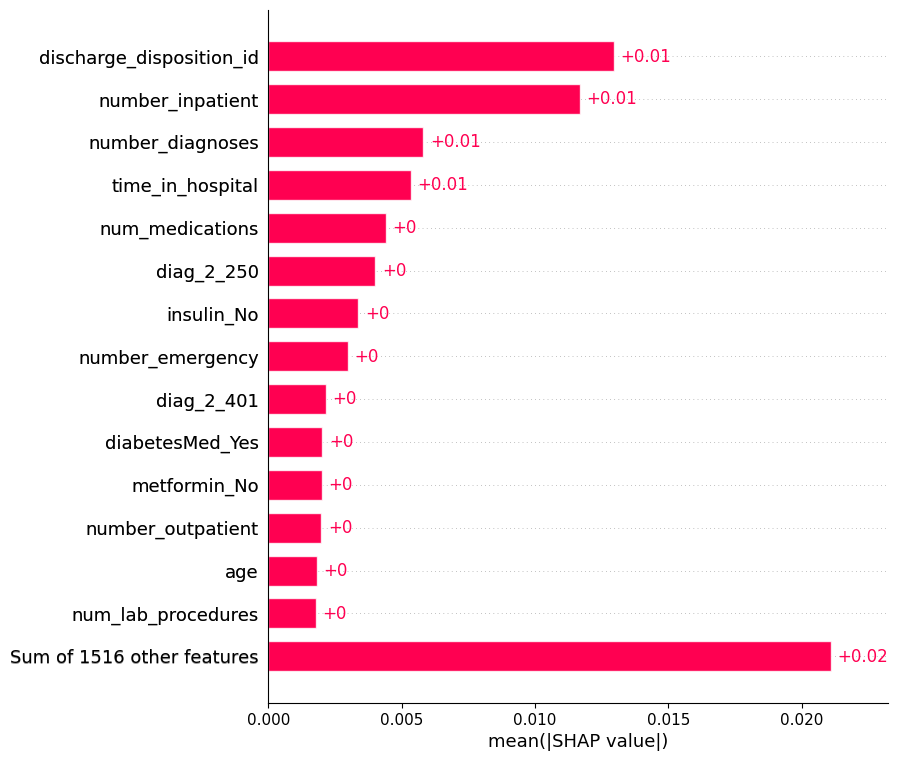

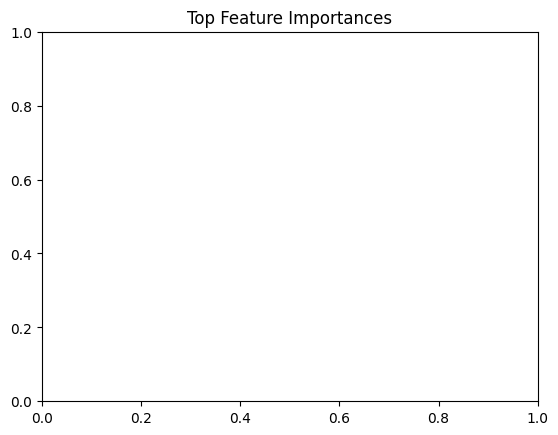

In [9]:

shap.plots.bar(shap_values, max_display=15)
plt.title("Top Feature Importances")
plt.savefig('outputs/shap_feature_importance.png', bbox_inches='tight')
plt.show()

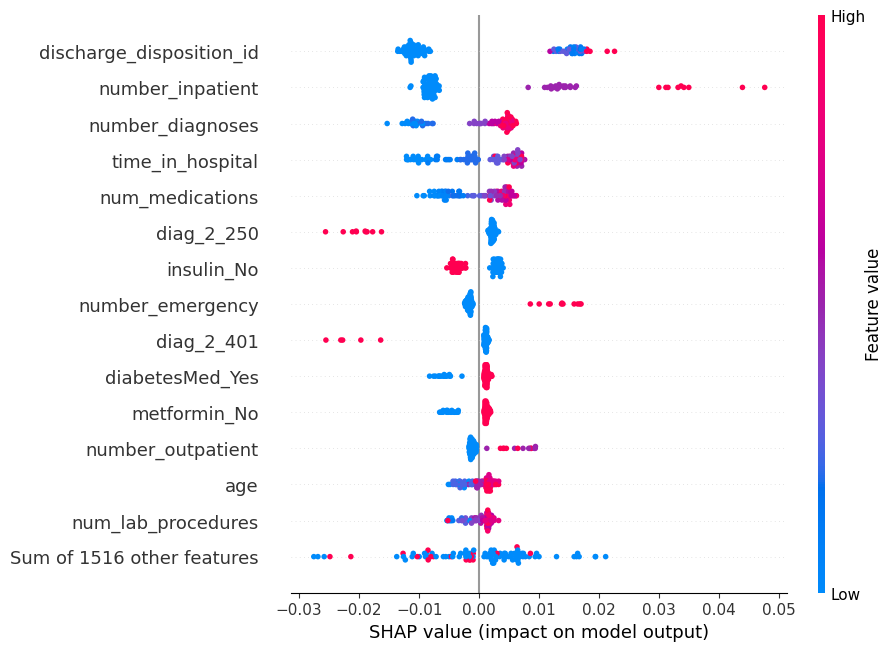

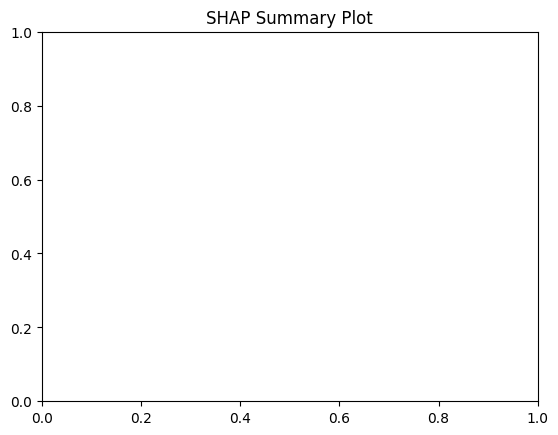

In [10]:
### 7. SHAP Summary Plot

shap.plots.beeswarm(shap_values, max_display=15)
plt.title("SHAP Summary Plot")
plt.savefig('outputs/shap_summary_plot.png', bbox_inches='tight')
plt.show()


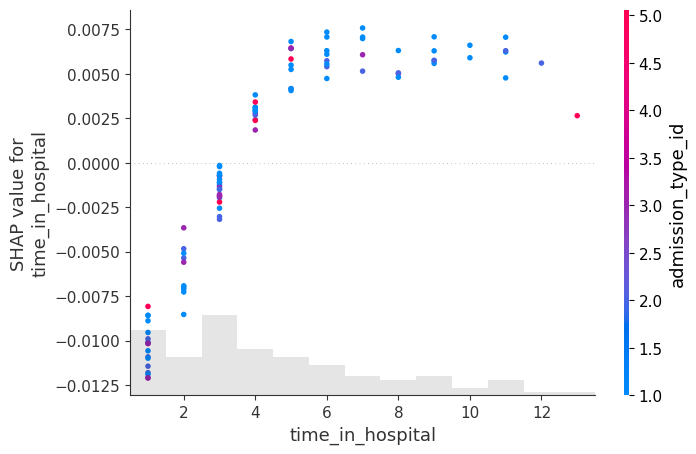

In [11]:
### 8. SHAP Dependence Plot (example: 'time_in_hospital')

# Replace with a valid feature name from your data
shap.plots.scatter(shap_values[:, "time_in_hospital"], color=shap_values)


In [12]:
### 9. Force Plot for a Single Prediction

# Show detailed explanation for one patient
i = 0  # Index of sample
shap.plots.force(shap_values[i])


In [13]:
### 10. Save SHAP Values for Dashboard Use (Optional)

np.save('outputs/shap_values.npy', shap_values.values)
X_sample.to_csv('outputs/shap_input.csv', index=False)
